In [2]:
import pandas as pd

file_path = 'IMDb Movies India.csv'

try:
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

print("--- First 5 Rows ---")
print(df.head())

print("\n\n--- Data Info ---")
df.info()

--- First 5 Rows ---
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Si

In [4]:
print(f"Missing ratings before cleaning: {df['Rating'].isnull().sum()}")

df.dropna(subset=['Rating'], inplace=True)

print(f"Missing ratings after cleaning: {df['Rating'].isnull().sum()}")

print(f"Shape of the dataframe after dropping rows: {df.shape}")

Missing ratings before cleaning: 0
Missing ratings after cleaning: 0
Shape of the dataframe after dropping rows: (7919, 10)


In [5]:
df['Votes'] = df['Votes'].str.replace(',', '', regex=True).astype(float)

median_votes = df['Votes'].median()
df['Votes'].fillna(median_votes, inplace=True)

for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col].fillna('Unknown', inplace=True)

print("Remaining missing values in each column:")
print(df.isnull().sum())

Remaining missing values in each column:
Name           0
Year           0
Duration    2068
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64


C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\1235316533.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna(median_votes, inplace=True)
C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\1235316533.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


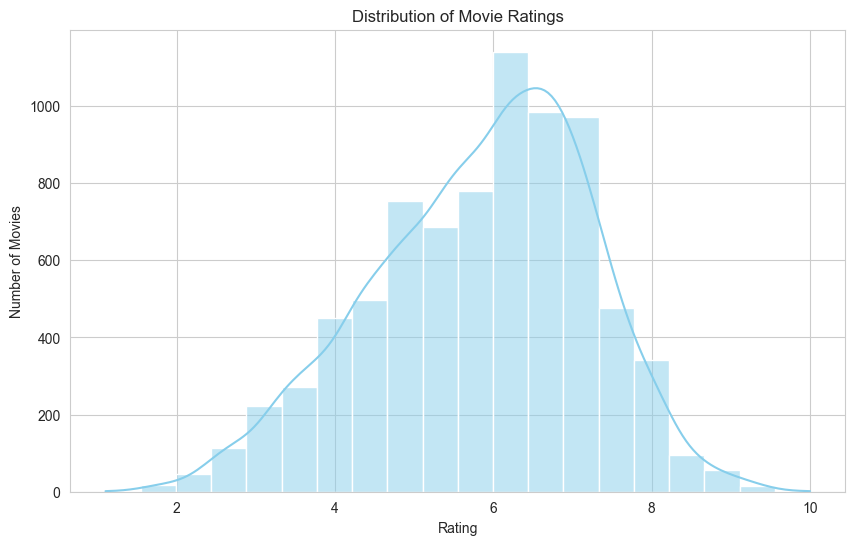

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

plt.show()

C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\501950701.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Primary Genre', data=df_top_genres, orient='h', palette='viridis', ci=None)
C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\501950701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Primary Genre', data=df_top_genres, orient='h', palette='viridis', ci=None)


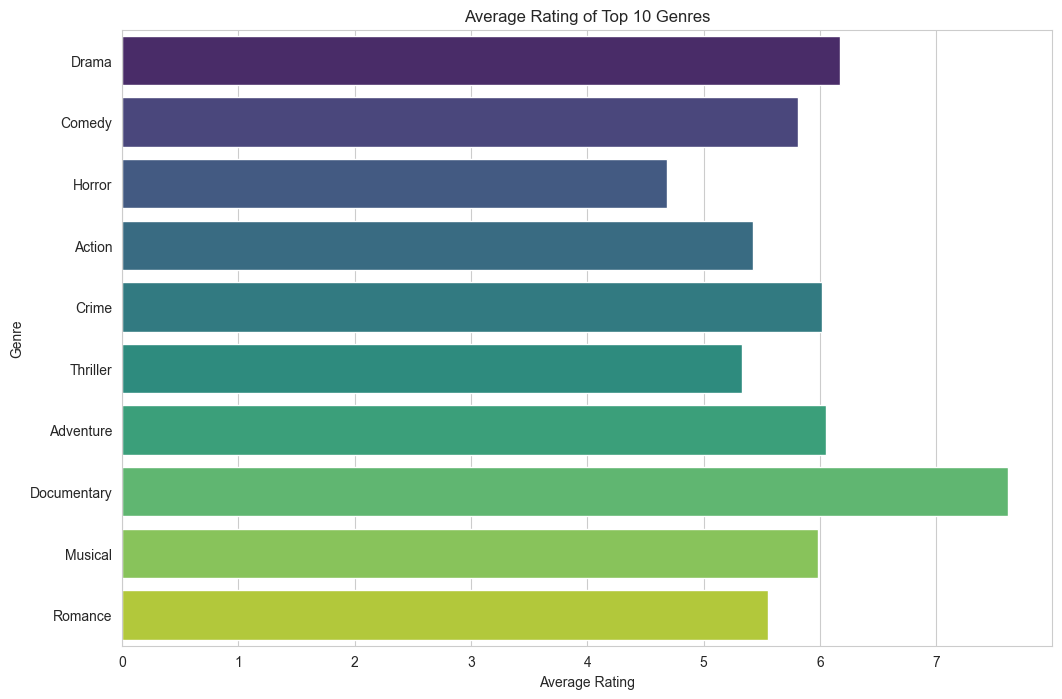

In [7]:
df['Primary Genre'] = df['Genre'].str.split(',').str[0]

top_genres = df['Primary Genre'].value_counts().head(10).index

df_top_genres = df[df['Primary Genre'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Primary Genre', data=df_top_genres, orient='h', palette='viridis', ci=None)

plt.title('Average Rating of Top 10 Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genre')

plt.show()

C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\287566922.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Director', data=df_top_directors, orient='h', palette='coolwarm', ci=None)
C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\287566922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Director', data=df_top_directors, orient='h', palette='coolwarm', ci=None)


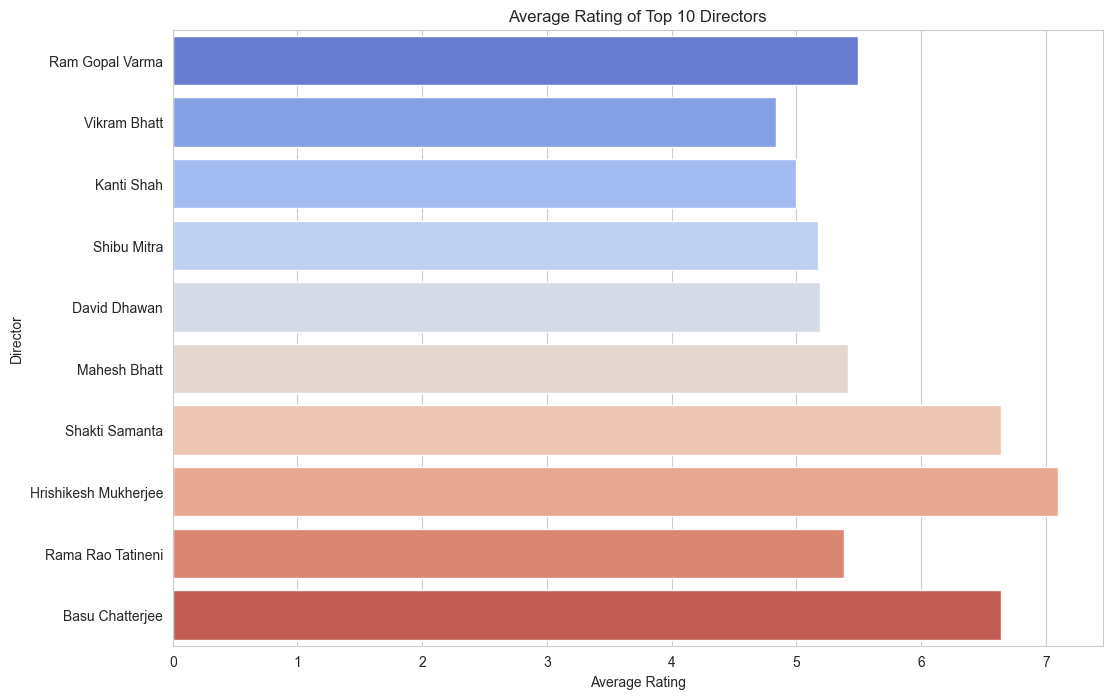

In [8]:
top_directors = df['Director'].value_counts().head(10).index

df_top_directors = df[df['Director'].isin(top_directors)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Director', data=df_top_directors, orient='h', palette='coolwarm', ci=None)

plt.title('Average Rating of Top 10 Directors')
plt.xlabel('Average Rating')
plt.ylabel('Director')

plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

features = ['Votes', 'Genre', 'Director', 'Actor 1']
target = 'Rating'

X = df[features]
y = df[target]

label_encoders = {}
for col in ['Genre', 'Director', 'Actor 1']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training is complete! ✅")

C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\4238603504.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\4238603504.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_1240\4238603504.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Model training is complete! ✅


--- Model Performance ---
Mean Absolute Error (MAE): 0.97
Mean Squared Error (MSE): 1.52
R-squared (R²) Score: 0.19


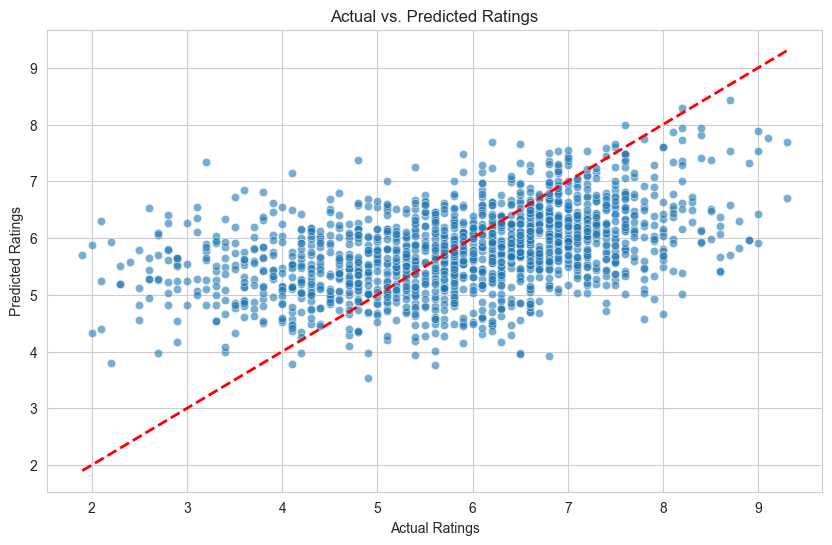

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("--- Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Diagonal line
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()